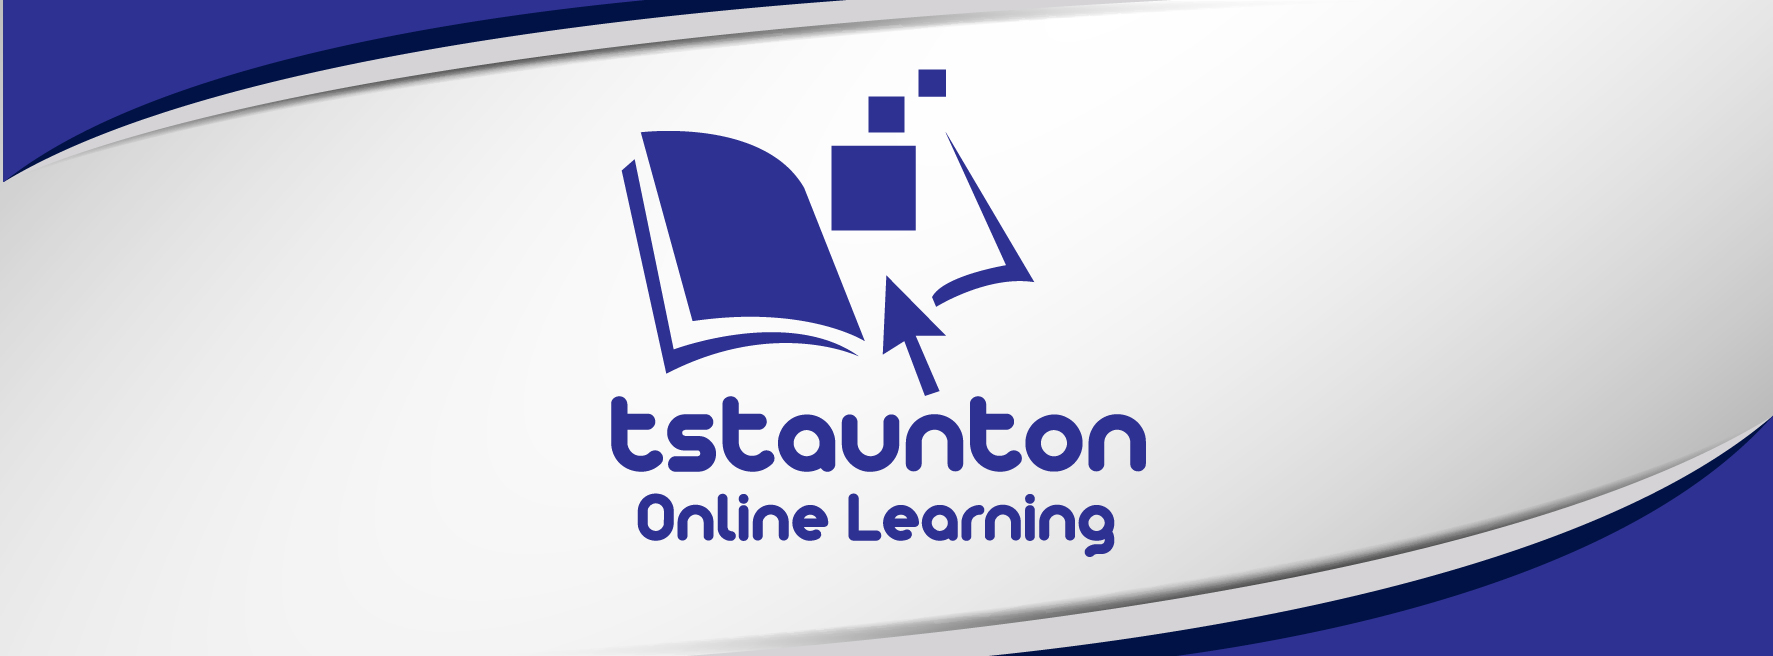
***
# Default arguments & variable-length arguments
***

In previous lessons you have learned how to create your own functions, write functions with multiple parameters and functions that can return several values using Tuples. 

In all of these examples we have been defining variables and using them without any issues. Now you are going to learn that not all objects you create are going to be accessible everywhere within your scripts. This is where the idea of **scope** in user-defined functions (functions written by you) comes in. **Scope tells us in which part of a program an object may be accessible from.**

For the context of this lesson and those to come, names can refer to variable names or the names of functions. As we have already seen variables have names as do functions themselves. 

There are three types of scope that you need to know about:

- Global: defined in the main body of a program
- Local: defined inside a function. Names cannot be accessed outside the function definition
- Built-in: names in Python's pre-defined built-in modules such as print and sum

To help make things a little clearer let's look at some examples.

In [1]:
def square(value):
    """Returns the square of a number."""
    new_val = value ** 2
    return new_val

square(10)

100

In [3]:
# Try to access new_val after function execution
new_val

NameError: name 'new_val' is not defined

As you can see we cannot access the variable name **new_value** after the functions execution. This is because it was defined only in the local scope of the function. The name **new_value** was not defined globally.

What if we defined the name globally before defining and calling the function?

In [4]:
# Create a global variable
new_value = 10

def square(value):
    """Returns the square of a number."""
    new_value = value ** 2
    return new_value

square(5)

25

In [5]:
new_value

10

Now anytime we call the name in the global scope it will access the name from the global scope.

Why is the value of **new_value** 10 and not 25? Anytime we call the name in the local scope of the function it will look first in the local scope which is why calling square(5) results in 25 and not 10. If python cannot find the name in the local scope it will then look in the global scope. 

In the below example we access **new_value** which is defined globally within the function square. The global value access is the value at the time the function is called not the value when the function is defined.

If we were to reassign the value of **new_value** and call the function square we see that the new value of **new_value** is accessed.

In [7]:
new_value = 10

def square(value):
    """Returns the square of a number"""
    new_value2 = new_value ** 2
    return new_value2

square(3)

100

In [8]:
new_value = 20

In [9]:
square(3)

400

What if we want to change the value of a global name within a function call? This is where we can make use of the keyword global. 

In [10]:
new_value = 10

def square(value):
    """Returns the square of a number"""
    global new_value
    new_value = new_value ** 2
    return new_value

Here within the function definition we use the keyword global followed by the name of the global variable we wish to access and change. 

In [11]:
square(3)

100

In [12]:
new_value

100

When we call **new_value** we see from the output that the global value has been squared by running the function.

In [14]:
# Create a string variable: book_name
book_name = "My Book"

# Define change_book()
def change_book():
    """Change the value of the global variable book_name."""

    # Use book_name in global scope
    global book_name

    # Change the value of book_name in global
    book_name = "The Book About Me!"
    
# Print book_name
print(book_name)

# Call change_book()
change_book()

# Print book_name
print(book_name)

My Book
The Book About Me!


### View all Python's built in functions

In [15]:
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

## Nested Functions
With your familiarity of functions growing it's time to take a look at nested functions. Consider a function, **f_inside**, within a function, **f_outside**. The syntax of this would function would look something like the following.

In [ ]:
def f_outside():
    """Demonstrating nested functions"""
    x = ???
    
    def f_inside():
        """A function inside a function"""
        y = x ** x
        
    return value

In the example above we have x referenced in function f_inside. We have also have x referenced in the outer function, f_outside. How does Python handle this? Python first searches within the local scope of **f_inside**. If Python does not find x it searches the scope of **f_outside**. 

The function **f_outside** is whats known as an **enclosing function** as it encloses the function **f_inside**. If python cannot find **x** in the scope of the enclosing function it then searches global and finally built-in scope. 

### Why nest functions?
Imagine we want to use a process a number of times within a function. A function that takes several numbers as parameters and performs the same operation on each of them. One way we could handle this is to write out the process several times. However this method does not scale. What if instead we needed to perform this process 100 times or a 1000? Let's take a look at an example.

In [16]:
def adding(x1, x2, x3, x4):
    """Returns the result of four values plus 7"""
    addition1 = x1 + 7
    addition2 = x2 + 7
    addition3 = x3 + 7
    addition4 = x4 + 7
    
    return (addition1, addition2, addition3, addition4)

As you can see, not very scalable. Alternatively, what we can do is define an inner function within our function definition and call it when necessary.

In [17]:
# Demonstrate a nested function
def adding(x1, x2, x3, x4):
    """Add four numbers with 7."""
    
    def inner(x):
        """Perform addition"""
        return x + 7
    
    return (inner(x1), inner(x2), inner(x3), inner(x4))

adding(1, 2, 3, 4)

(8, 9, 10, 11)

In [18]:
type(adding)

function

What we have just done is created a **nested function**. The syntax for a nested function is the same as for any other function. When using scopes remember that they will search in the following order, **local scope, enclosing function, global scope and built-in scope**. This order is known as the LEGB rule.

When using nested functions there is a term known as closure. Closure means that the nested or inner function remembers the state of its enclosing scope when called. Anything defined locally in the enclosing scope is available to the inner function even when the outer function has finished execution. It's a little bit hard to understand but you'll get the hang of it when we start looking at some more examples. For know it's just good to know of closures existence. You never now, someone might bring it up at work today!

In [19]:
# Define an outer function my_echo
def my_echo(n):
    """Return the inner_echo function."""

    # Define inner_echo
    def inner_echo(word1):
        """Concatenate n copies of word1."""
        echo_word = word1 * n
        return echo_word

    # Return inner_echo
    return inner_echo

# Call echo twice
twice = my_echo(2)

# Call echo three times
three = my_echo(3)

# Call twice() and three() then print
print(twice('hello'), three('hello'))

hellohello hellohellohello


At this point you might be wondering, is it possible to alter the value of a variable defined in the enclosing scope? It is and we can do it with the keyword **nonlocal** used within a nested function. Have a look. 

In [20]:
# Define echo_shout()
def my_echo(word):
    """Change the value of a nonlocal variable"""
    
    # Concatenate word with itself, echo_word
    echo_word = word*2
    
    # Print echo_word
    print(echo_word)
    
    # Define inner function shout()
    def my_echo():
        """Alter a variable in the enclosing scope"""
        
        # Use echo_word in nonlocal scope
        nonlocal echo_word
        
        # Change echo_word to echo_word concatenated with '!!!'
        echo_word = echo_word + '!!!'
    
    # Call function my_echo
    my_echo()
    
    # Print echo_word
    print(echo_word)

# Call function echo_shout() with argument 'hello'
my_echo('hello')

hellohello
hellohello!!!


## Default and flexible arguments
In our next example let's work with a function that accepts multiple parameters. Let's assume that one of these parameters has a common value. A common value could be anything such as days in a week or year. In the example to come we are going to provide one of our parameters with a default argument unless otherwise specified. 

Applying a default argument to a parameter is relatively straight forward. You need only add an equals (=) symbol after the parameter followed by the value in the function header.

In [21]:
def squared (number, pow=2):
    """Square any number."""
    squared_value = number ** pow
    return squared_value

In [22]:
squared(9)

81

In [24]:
squared(9,1)

9

In [25]:
squared(9, 5)

59049

Let's look at another example.

In [28]:
# Define shout_echo
def my_echo(word1, echo=1, scream=False):
    """Concatenate echo copies of word1 and three
    exclamation marks at the end of the string."""

    # Concatenate echo copies of word1 using *: echo_word
    echo_word = word1 * echo

    # Capitalize echo_word if scream is True
    if scream is True:
        # Capitalize and concatenate '!!!': echo_word_new
        echo_word_new = echo_word.upper() + '!!!'
    else:
        # Concatenate '!!!' to echo_word: echo_word_new
        echo_word_new = echo_word + '!!!'

    # Return echo_word_new
    return echo_word_new

# Call shout_echo() with "Hey", echo=5 and scream=True: with_big_echo
with_big_echo = my_echo("Hey", echo=5, scream=True)

# Call shout_echo() with "Hey" and scream=True: big_no_echo
big_no_echo = my_echo("Hey", scream=False)

# Print with_big_echo and big_no_echo
print(with_big_echo)
print(big_no_echo)

HEYHEYHEYHEYHEY!!!
Hey!!!


## Flexible arguments
So far we've looked at fixed and default arguments but we won't always know how many arguments that we may want to pass to a function. Do deal with this we can use flexible arguments. For example, what if we want to sum not just two but several numbers, much like a calculator does. Here is where we can use flexible arguments.

In [30]:
# Turns all arguments passed to args into a tuple
def add_all(*args): 
    """Sum all values in *args together."""
    
    # Initialize sum_all
    sum_all = 0
    
    # Accumulate the sum
    for num in args: # loop over the tuple args and add each element together
        sum_all += num
        
    return sum_all

In [31]:
add_all(1)

1

In [32]:
add_all(1846, 38404)

40250

In [33]:
add_all(1.1, 1.1)

2.2

In the function definition above we used the parameter ***args** to turns all the arguments passed to a function call into a Tuple called args in the function body.

As you can see in the function body, we then loop over the tuple **args** and add each element to **sum_all**. We then return **sum_all** and are ready to call our function.

We can now pass any number of floats or integers to **add_all** and have them summed up.

### Kwargs
We've just seen how to pass an arbitrary number of floats or ints to a function. How about an arbitrary number of keywords? To do this we use a double star followed by **kwargs**, \**kwargs, also called "kwargs". kwargs are arguments preceded by identifiers, like this:
> print_all(employee="Tony Staunton", position="Python Developer")

What we are doing in this line of code is calling a function called **print_all** and passing to it **identifiers** and **parameters**.

Let's write the function **print_all**. To begin we use the parameter **kwargs** preceded by a double star. This turns the identifier keyword pairs into a dictionary within the function body. Then in the function body we simply need to print all the key value pairs stored in the dictionary **kwargs**.

It's important to point out that it is not the name **args** and **kwargs** that are important when using flexible arguments but rather that they are preceded by a single and double star.

Let's look at the function **print_all**.

In [34]:
# Create a new function using **kwargs
def print_all(**kwargs):
    """Print out key-value pairs in **kwargs."""
    
    print("\nBEGIN EMPLOYEE REPORT\n")
    
    #Print out the key-value pairs
    for key, value in kwargs.items():
        print(key + ": " + value)
        
    print("\nEND EMPLOYEE REPORT\n")
        
print_all(employee="Tony Staunton", position="Python Developer")

print_all(employee="Jane Smith", position="Head of MArketing")


BEGIN EMPLOYEE REPORT

employee: Tony Staunton
position: Python Developer

END EMPLOYEE REPORT


BEGIN EMPLOYEE REPORT

employee: Jane Smith
position: Head of MArketing

END EMPLOYEE REPORT



## Example

In a previous exercise we created a function that compiles the different types of work departments in a sample HR dataset download from IBM. The output of this function was a dictionary that had the departments as the keys and the counts of staff in that department as the value.

In this exercise, we will generalize the department analysis that we did in the previous lesson. To do this, we will include a default argument that takes a column name.

In [36]:
import pandas as pd

df = pd.read_csv('datasets/02_sample_employee_dataset.csv')

# Define count_entries()
def count_entries(df, col_name='Department'):
    """Return a dictionary with counts of occurrences as value for each key."""

    # Initialize an empty dictionary 
    column_count = {}

    # Extract column from dataframe
    col = df[col_name]

    # Iterate over dept column in DF
    for entry in col:
    
        # If department is in column_count, add 1
        if entry in column_count.keys():
            column_count[entry] +=1
        
        # Else ass the department to depart_count and set the value to 1
        else:
            column_count[entry] = 1
            
    # Return the department_count dictionary
    return column_count

# Call count_entries(): result
result1 = count_entries(df, col_name='Department')
result2 = count_entries(df, col_name='JobRole')

print(result1)
print(result2)

{'Sales': 446, 'Research & Development': 961, 'Human Resources': 63}
{'Sales Executive': 326, 'Research Scientist': 292, 'Laboratory Technician': 259, 'Manufacturing Director': 145, 'Healthcare Representative': 131, 'Manager': 102, 'Sales Representative': 83, 'Research Director': 80, 'Human Resources': 52}


You've just generalized your department analysis that you did in the previous lesson to include a default argument for the column name. 

You're now going to generalize this function one step further by allowing the user to pass it a flexible argument, that is, in this case, as many column names as the user would like!

In [37]:
import pandas as pd

df = pd.read_csv('datasets/02_sample_employee_dataset.csv')

# Define count_entries()
def count_entries(df, *args):
    """Return a dictionary with counts of occurrences as value for each key."""

    # Initialize an empty dictionary 
    column_count = {}
    
    # Iterate over column name in args
    for column_name in args:

        # Extract column from dataframe
        col = df[column_name]

        # Iterate over dept column in DF
        for entry in col:
    
            # If department is in column_count, add 1
            if entry in column_count.keys():
                column_count[entry] +=1
        
            # Else ass the department to depart_count and set the value to 1
            else:
                column_count[entry] = 1
            
    # Return the department_count dictionary
    return column_count

# Call count_entries(): result
#result1 = count_entries(df, 'Department')
result2 = count_entries(df, 'Department', 'EducationField')

#print(result1)
print(result2)

{'Sales': 446, 'Research & Development': 961, 'Human Resources': 90, 'Life Sciences': 606, 'Other': 82, 'Medical': 464, 'Marketing': 159, 'Technical Degree': 132}
